In [2]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


/Users/pkim/Dropbox/Projects/HotelReviews


In [3]:
import os
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
data_path = 'files/read_in.pkl'
reviews = pd.read_pickle(data_path)
review = reviews.copy()

In [5]:
reviews.describe().round(3)

,hotel_rating_review,num_amenities,hotel_rating_hotel,low_price,high_price
count,120893.000,120893.000,120893.000,120554.000,120554.000
mean,4.014,23.149,4.008,147.661,356.803
std,1.215,4.907,0.479,49.230,150.493
min,1.000,0.000,1.000,52.000,75.000
25%,3.000,21.000,4.000,123.000,251.000
50%,4.000,24.000,4.000,142.000,350.000
75%,5.000,26.000,4.500,162.000,452.000
max,5.000,34.000,5.000,588.000,1387.000


Text(0.5, 1.0, 'Histogram: Reviews per hotel')

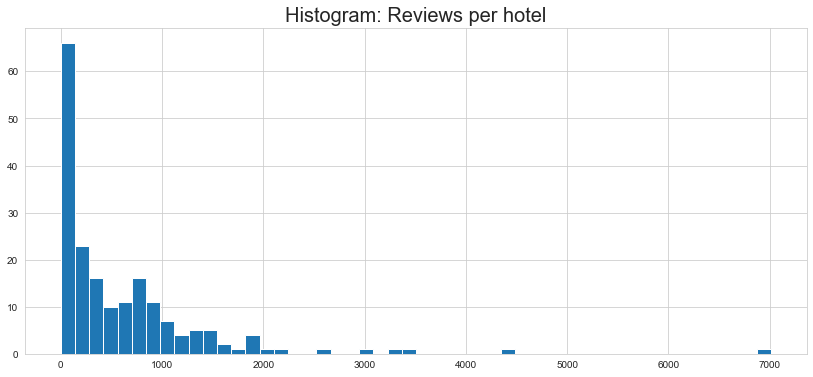

In [6]:
count_review = reviews.groupby('hotel_name').agg('count')['review']
fig = plt.figure(figsize=(14,6))
plt.hist(count_review.values, bins = 50)
plt.title('Histogram: Reviews per hotel', fontsize=20)


Text(0.5, 1.0, 'Histogram of # reviews per hotel')

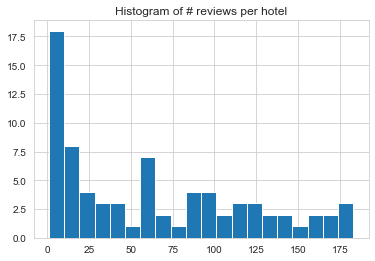

In [6]:
plt.hist(count_review[count_review.values<200].values, bins = 20)
plt.title('Histogram of # reviews per hotel')

In [7]:
sum(count_review.values < 50)


36

Text(0.5, 1.0, 'Histogram of # reviews per hotel')

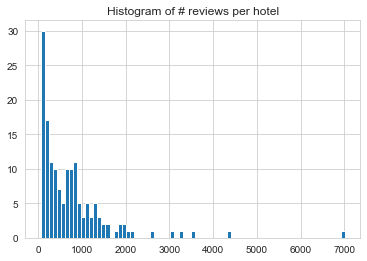

In [8]:
plt.hist(count_review[count_review.values>50].values, bins = 75)
plt.title('Histogram of # reviews per hotel')


In [9]:
count_review[count_review.values <= 50]


hotel_name
A2C Budget Hotel                                          28
AC Hotel Atlanta Midtown                                   5
Alexan Lenox Apartments                                    1
Atl Peaceful Stay                                          2
Atlanta Craftsman                                          1
Atlanta Marriott Northeast/Emory Area                      2
Biltmore Suites                                            1
Buckhead Chateau Bed and Breakfast                         1
Budget Inn                                                 2
Budgetel Atlanta                                           4
Fulton Inn Motor Hotel                                     4
Greenwood Bed and Breakfast                               30
Hampton Inn Atlanta Midtown                               17
Holiday Inn Atlanta Midtown                                3
Holiday Inn Express                                        2
InTown Suites Atlanta Central                             10
Inman Park Be

In [10]:
reviews.groupby('hotel_rating_review').agg('count')['review']


hotel_rating_review
1     7488
2     7757
3    14314
4    29904
5    54899
Name: review, dtype: int64

Text(0, 0.5, 'Hotel Rating based on Reviews')

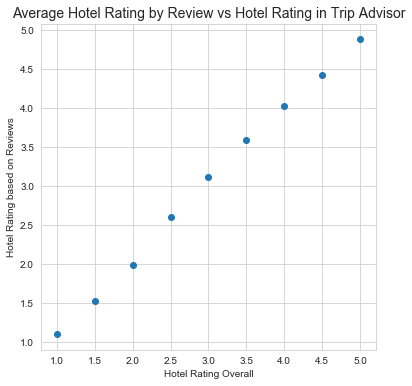

In [14]:
fig = plt.figure(figsize=(6,6))
plt.scatter(reviews.groupby('hotel_rating_hotel').agg('mean')['hotel_rating_review'].index,reviews.groupby('hotel_rating_hotel').agg('mean')['hotel_rating_review'].values)
plt.title("Average Hotel Rating by Review vs Hotel Rating in Trip Advisor", fontsize = 14)
plt.xlabel('Hotel Rating Overall')
plt.ylabel('Hotel Rating based on Reviews')


In [12]:
review['hotel_name'] = reviews['hotel_name'].apply(lambda x: x if x in list(set(count_review[count_review.values > 50].index)) else np.NaN)



In [13]:
review = review.dropna(axis=0)


In [14]:
review.head()


,review,hotel_name,travel_type,url_x,hotel_rating_review,url_y,num_amenities,num_rooms,hotel_rating_hotel,low_price,...,Restaurant,Room service,Sauna,Self-Serve Laundry,Shuttle Bus Service,Smoking rooms available,Spa,Suites,Tennis Court,Wheelchair access
0,I had a enjoyable time during my stay there on...,Holiday Inn & Suites Atlanta Airport - North,Traveled on business,https://www.tripadvisor.com/ShowUserReviews-g6...,4,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,...,True,True,False,True,True,False,False,True,False,True
1,My husband came to ATL on a business trip. We ...,Holiday Inn & Suites Atlanta Airport - North,Traveled on business,https://www.tripadvisor.com/ShowUserReviews-g6...,2,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,...,True,True,False,True,True,False,False,True,False,True
2,This hotel is convenient for park and fly to A...,Holiday Inn & Suites Atlanta Airport - North,Traveled solo,https://www.tripadvisor.com/ShowUserReviews-g6...,5,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,...,True,True,False,True,True,False,False,True,False,True
3,I had the pleasure of being served by Andrene ...,Holiday Inn & Suites Atlanta Airport - North,Traveled with family,https://www.tripadvisor.com/ShowUserReviews-g6...,5,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,...,True,True,False,True,True,False,False,True,False,True
4,The room we were in was not sooooo great stain...,Holiday Inn & Suites Atlanta Airport - North,Traveled with family,https://www.tripadvisor.com/ShowUserReviews-g6...,2,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,...,True,True,False,True,True,False,False,True,False,True


Text(0.5, 1.0, 'Average hotel rating by review vs hotel rating in Trip Advisor')

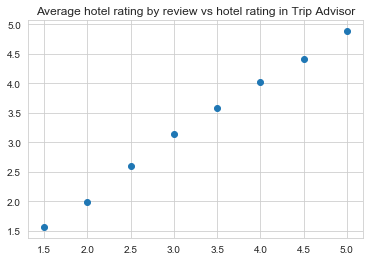

In [15]:
plt.scatter(review.groupby('hotel_rating_hotel').agg('mean')['hotel_rating_review'].index,review.groupby('hotel_rating_hotel').agg('mean')['hotel_rating_review'].values)
plt.title("Average hotel rating by review vs hotel rating in Trip Advisor")



In [27]:
review.groupby('hotel_rating_hotel').agg('mean')['hotel_rating_review']


hotel_rating_hotel
1.5    1.566372
2.0    1.984848
2.5    2.605099
3.0    3.133813
3.5    3.588663
4.0    4.020917
4.5    4.415213
5.0    4.883258
Name: hotel_rating_review, dtype: float64

In [28]:
review.groupby('hotel_rating_hotel').agg('mean')

,hotel_rating_review,num_amenities,low_price,high_price,Accessible rooms,Air conditioning,Airport transportation,Babysitting,Banquet Room,Bar/Lounge,...,Restaurant,Room service,Sauna,Self-Serve Laundry,Shuttle Bus Service,Smoking rooms available,Spa,Suites,Tennis Court,Wheelchair access
hotel_rating_hotel,,,,,,,,,,,,,,,,,,,,,
1.5,1.566372,9.765487,66.106195,312.960177,0.000000,1.000000,0.553097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.553097,0.553097,0.000000,0.000000,0.000000,1.000000
2.0,1.984848,10.037879,332.681818,598.784091,0.481061,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.518939,0.000000,0.000000,0.000000,0.000000,0.000000,0.481061
2.5,2.605099,16.870968,88.768991,166.604579,0.065036,0.260666,0.195630,0.000000,0.934964,0.739334,...,0.739334,0.739334,0.000000,0.000000,0.739334,0.000000,0.195630,0.934964,0.000000,1.000000
3.0,3.133813,19.307231,121.443144,227.309931,0.095110,0.753375,0.000000,0.000000,0.552655,0.552655,...,0.552655,0.672967,0.000000,0.324932,0.000000,0.087609,0.000000,0.587159,0.000000,1.000000
3.5,3.588663,20.039653,126.407500,253.365356,0.146089,0.781406,0.372492,0.000000,0.628383,0.537970,...,0.597953,0.535142,0.011108,0.477851,0.596540,0.000000,0.000000,0.544500,0.053588,0.951461
4.0,4.020917,23.562068,144.019126,379.933851,0.358435,0.920723,0.089888,0.000000,0.726637,0.817961,...,0.753941,0.807485,0.021340,0.400676,0.177342,0.000000,0.182715,0.826983,0.013145,0.998986
4.5,4.415213,25.752406,171.673377,403.782649,0.426363,0.881808,0.343211,0.184604,0.677135,0.790316,...,0.733282,0.751917,0.106492,0.310829,0.419368,0.000000,0.388850,1.000000,0.000000,0.998167
5.0,4.883258,10.975566,229.639819,366.065158,0.000000,0.554751,0.000000,0.000000,0.185520,0.185520,...,0.185520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769231,0.000000,0.185520


In [16]:
hotel_info = pd.read_pickle('files/hotel_info.pkl')
hotel_info = hotel_info.merge(pd.DataFrame(review['hotel_name'].unique(), columns=['hotel_name']), how = 'right', on= 'hotel_name')


In [52]:
hotel_info.describe().round(3)

,num_amenities,hotel_rating_hotel,low_price,high_price
count,150.000,150.000,150.000,150.000
mean,20.607,3.873,140.960,307.313
std,5.652,0.608,60.704,156.083
min,5.000,1.500,54.000,94.000
25%,17.000,3.500,110.250,211.250
50%,22.000,4.000,134.500,276.000
75%,25.000,4.000,156.750,388.750
max,34.000,5.000,588.000,1387.000


In [53]:
hotel_info

,hotel_name,url,num_amenities,num_rooms,hotel_rating_hotel,low_price,high_price,Accessible rooms,Air conditioning,Airport transportation,...,Restaurant,Room service,Sauna,Self-Serve Laundry,Shuttle Bus Service,Smoking rooms available,Spa,Suites,Tennis Court,Wheelchair access
0,Holiday Inn & Suites Atlanta Airport - North,https://www.tripadvisor.com/Hotel_Review-g6089...,24,330,4.5,117.0,192.0,False,True,True,...,True,True,False,True,True,False,False,True,False,True
1,Hyatt Regency Atlanta Perimeter at Villa Chris...,https://www.tripadvisor.com/Hotel_Review-g6089...,24,182,4.5,131.0,468.0,False,False,True,...,True,True,False,False,True,False,False,True,False,True
2,Embassy Suites by Hilton Atlanta - Galleria,https://www.tripadvisor.com/Hotel_Review-g6089...,27,263,4.0,162.0,378.0,False,True,False,...,True,True,False,True,True,False,False,True,False,True
3,Homewood Suites by Hilton Atlanta Airport North,https://www.tripadvisor.com/Hotel_Review-g6089...,23,122,4.5,130.0,216.0,False,True,True,...,False,False,False,True,True,False,False,True,False,True
4,The Westin Buckhead Atlanta,https://www.tripadvisor.com/Hotel_Review-g6089...,23,365,4.5,189.0,456.0,False,False,False,...,True,True,False,False,False,False,False,True,False,True
5,Omni Hotel at the Battery Atlanta,https://www.tripadvisor.com/Hotel_Review-g6089...,28,264,4.5,199.0,655.0,True,True,False,...,True,True,False,False,True,False,False,True,False,True
6,Hilton Garden Inn Atlanta Downtown,https://www.tripadvisor.com/Hotel_Review-g6089...,27,242,4.0,143.0,445.0,False,True,False,...,True,True,False,True,False,False,False,True,False,True
7,Hyatt Place Atlanta/Downtown,https://www.tripadvisor.com/Hotel_Review-g6089...,15,94,4.0,134.0,297.0,False,True,False,...,False,True,False,False,True,False,False,False,False,True
8,Atlanta Airport Marriott Gateway,https://www.tripadvisor.com/Hotel_Review-g6089...,29,403,4.5,145.0,400.0,True,True,True,...,True,True,False,False,True,False,False,True,False,True
9,Georgia Tech Hotel and Conference Center,https://www.tripadvisor.com/Hotel_Review-g6089...,23,252,4.5,140.0,423.0,False,True,False,...,True,True,False,True,False,False,False,True,False,True


Text(0.5, 1.0, 'Violin Plot: Hotel Rating vs Number of Amenities')

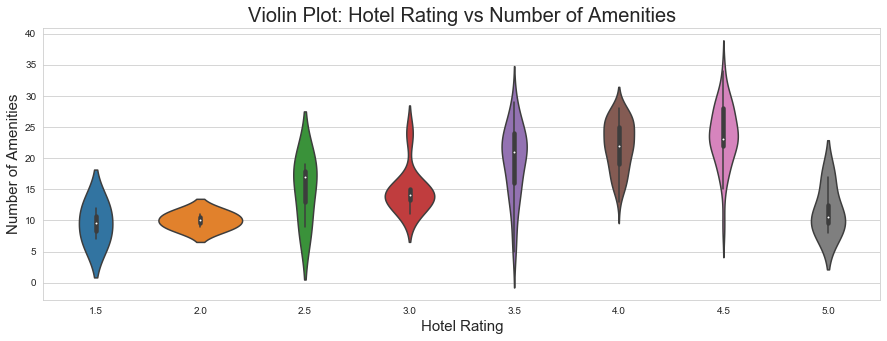

In [49]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(hotel_info['hotel_rating_hotel'],hotel_info['num_amenities'])
plt.xlabel('Hotel Rating', fontsize=15)
plt.ylabel('Number of Amenities', fontsize=15)
plt.title('Violin Plot: Hotel Rating vs Number of Amenities', fontsize=20)

Text(0.5, 1.0, 'Box Plot: Hotel Rating vs Number of Rooms')

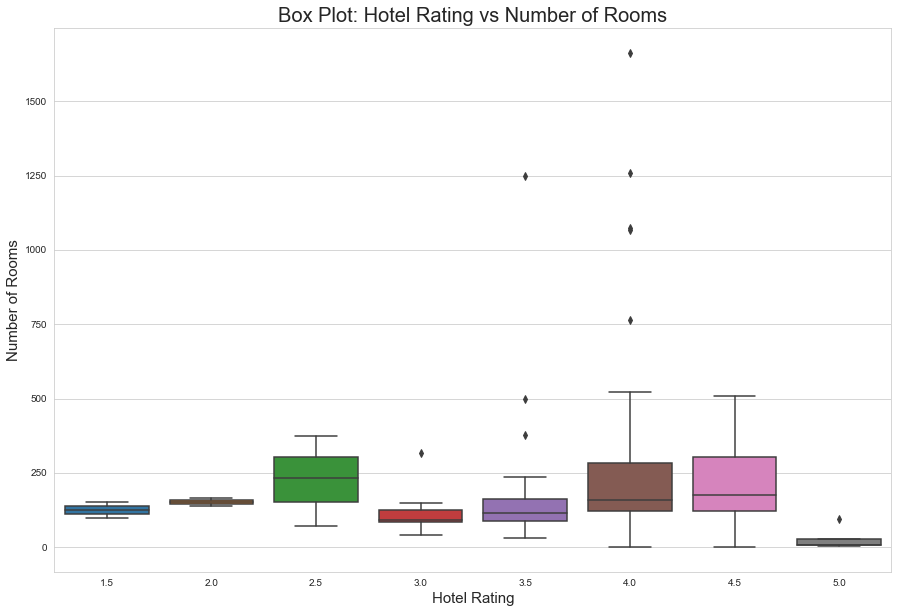

In [60]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(hotel_info['hotel_rating_hotel'],hotel_info['num_rooms'].apply(lambda x: int(x) if isinstance(x,str) else 0), orient='v')
plt.xlabel('Hotel Rating', fontsize=15)
plt.ylabel('Number of Rooms', fontsize=15)
plt.title('Box Plot: Hotel Rating vs Number of Rooms', fontsize=20)

Text(0.5, 1.0, 'Box Plot: Hotel Rating vs Highest Price Room')

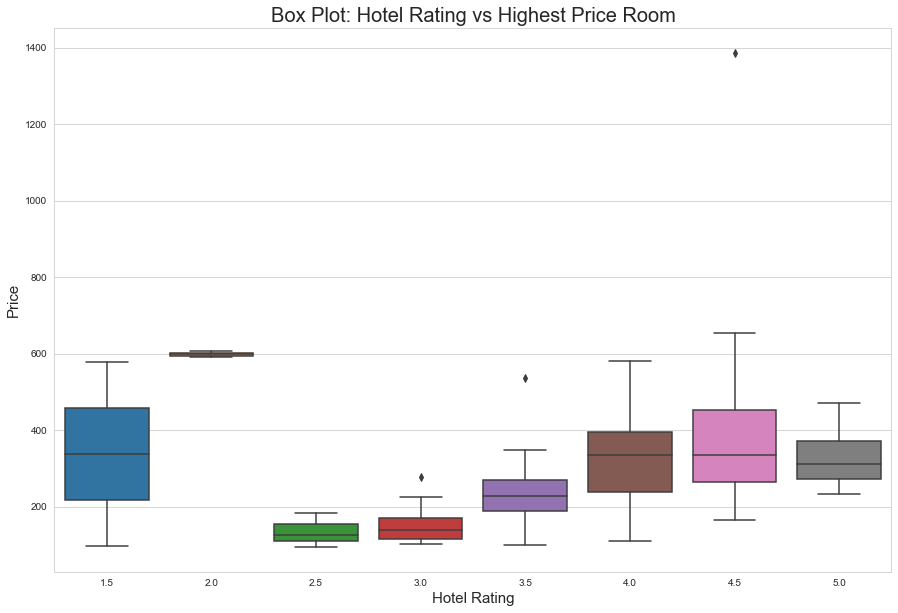

In [65]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(hotel_info['hotel_rating_hotel'],hotel_info['high_price'])
plt.xlabel('Hotel Rating', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Box Plot: Hotel Rating vs Highest Price Room', fontsize=20)

Text(0.5, 1.0, 'Box Plot: Hotel Rating vs Lowest Price Room')

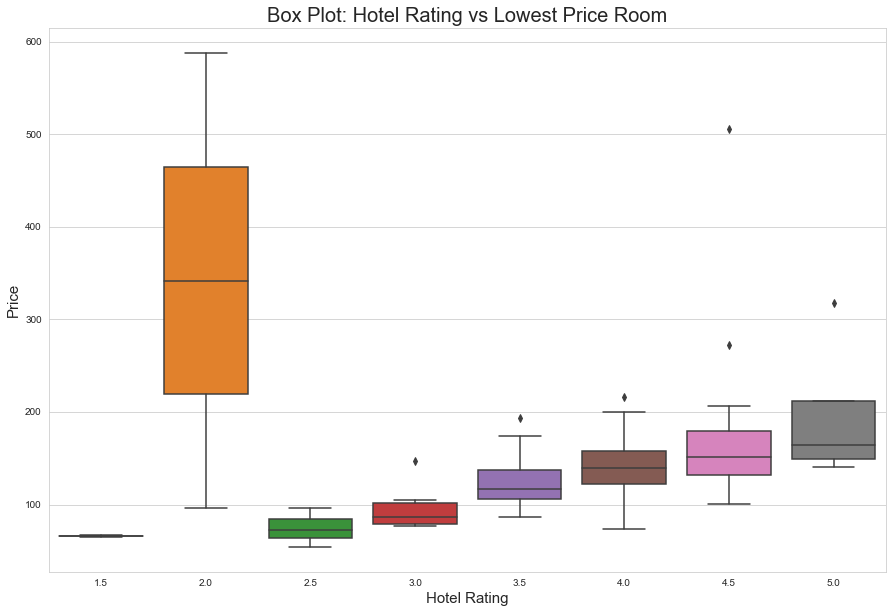

In [67]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(hotel_info['hotel_rating_hotel'],hotel_info['low_price'])
plt.xlabel('Hotel Rating', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Box Plot: Hotel Rating vs Lowest Price Room', fontsize=20)

In [73]:
reviews.groupby('hotel_name').agg('count')['review'].reset_index().merge(hotel_info, how="right", on="hotel_name").describe().round(3)


,review,num_amenities,hotel_rating_hotel,low_price,high_price
count,150.000,150.000,150.000,150.000,150.000
mean,757.493,20.607,3.873,140.960,307.313
std,874.343,5.652,0.608,60.704,156.083
min,57.000,5.000,1.500,54.000,94.000
25%,200.500,17.000,3.500,110.250,211.250
50%,535.500,22.000,4.000,134.500,276.000
75%,963.750,25.000,4.000,156.750,388.750
max,7013.000,34.000,5.000,588.000,1387.000


In [18]:
hotel_info.groupby('hotel_rating_hotel').agg('count')['hotel_name']

hotel_rating_hotel
1.0     3
1.5     7
2.0     4
2.5     6
3.0    14
3.5    38
4.0    69
4.5    37
5.0    11
Name: hotel_name, dtype: int64